In [2]:
%pylab nbagg
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Fig 2

In [5]:
# For each subject, start from your binary timeseries matrix ~(time,rois)

In [53]:
TSr=np.where(zdata['rest'][:,:5000]>3,1,0).T
TSm=np.where(zdata['music'][:,:5000]>3,1,0).T
TSs=np.where(zdata['speech'][:,:5000]>3,1,0).T

In [54]:
TSs.shape # binary timeseres matrix ~(time,rois)

(5000, 123)

In [69]:
def Significance(TSr,TSm,TSs,nsample=1000):
    
    tlen=TSr.shape[0] #time points
    N=TSr.shape[1] #number of regions
    
    # Observed Activty Engagements in r,m,s
    AEr=np.mean(TSr,axis=0)
    AEm=np.mean(TSm,axis=0)
    AEs=np.mean(TSs,axis=0)
    
    # Observed Delta Activty Engagements in m,s with respect to r
    DeltaAEm=AEm-AEr
    DeltaAEs=AEs-AEr
    
    # Obtain 1000 'AE' and 'DeltaAE' null models
    AEr_nulls=np.zeros((nsample,N))
    AEm_nulls=np.zeros((nsample,N))
    AEs_nulls=np.zeros((nsample,N))
    
    DeltaAEm_nulls=np.zeros((nsample,N))
    DeltaAEs_nulls=np.zeros((nsample,N))
    
    for i in range(nsample):
        # define surrogate matrices by randomly mixing the columns of TSr,TSm,TSs 
        X=np.vstack((TSr,TSm,TSs))
        np.random.shuffle(X)
        X = X.reshape(3, tlen, N)
        
        AEr_nulls[i]=np.mean(X[0],axis=0)
        AEm_nulls[i]=np.mean(X[1],axis=0)
        AEs_nulls[i]=np.mean(X[2],axis=0)
        
        # define delta surrogate matrices 
        X=np.vstack((TSr,TSm))
        np.random.shuffle(X)
        X = X.reshape(2, tlen, N)
        DeltaAEm_nulls[i]=np.mean(X[1],axis=0)-np.mean(X[0],axis=0)
        
        X=np.vstack((TSr,TSs))
        np.random.shuffle(X)
        X = X.reshape(2, tlen, N)
        DeltaAEs_nulls[i]=np.mean(X[1],axis=0)-np.mean(X[0],axis=0)        
    
    # Find significance 
    
    B=np.tile(AEr,(nsample,1))>AEr_nulls
    AEr_significance=1-np.sum(B,axis=0)/nsample
    
    B=np.tile(AEm,(nsample,1))>AEm_nulls
    AEm_significance=1-np.sum(B,axis=0)/nsample
    
    B=np.tile(AEs,(nsample,1))>AEs_nulls
    AEs_significance=1-np.sum(B,axis=0)/nsample
    
    B=np.tile(DeltaAEm,(nsample,1))>DeltaAEm_nulls
    DeltaAEm_significance=1-np.sum(B,axis=0)/nsample
    
    B=np.tile(DeltaAEs,(nsample,1))>DeltaAEs_nulls
    DeltaAEs_significance=1-np.sum(B,axis=0)/nsample
        
    return AEr_significance, AEm_significance, AEs_significance, DeltaAEm_significance, DeltaAEs_significance

In [70]:
import time
t = time.time()

p_ch_rest,p_ch_music,p_ch_speech,p_Delta_music,p_Delta_speech=Significance(TSr,TSm,TSs,nsample=1000)

elapsed = time.time() - t
elapsed

76.9820396900177

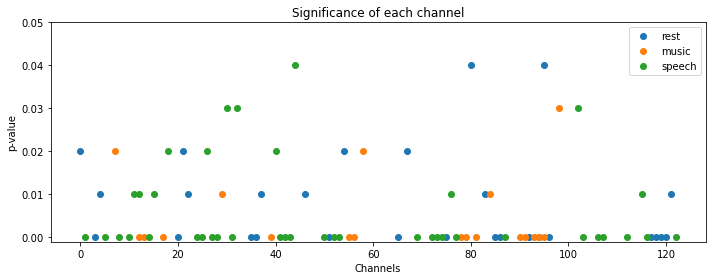

In [64]:
plt.figure(figsize=(10,4))
plt.title('Significance of each channel')
plt.plot(p_ch_rest,'o',label='rest')
plt.plot(p_ch_music,'o',label='music')
plt.plot(p_ch_speech,'o',label='speech')
plt.legend()
plt.ylim(-0.001,0.05)
plt.xlabel('Channels')
plt.ylabel('p-value')
plt.tight_layout()
plt.show()

In [61]:
p_ch_rest.shape

(123,)

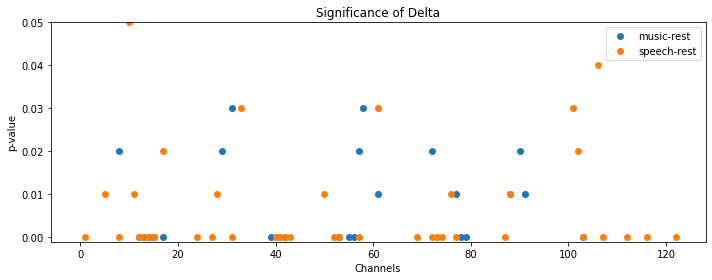

In [59]:
plt.figure(figsize=(10,4))
plt.title('Significance of Delta')
plt.plot(p_Delta_music,'o',label='music-rest')
plt.plot(p_Delta_speech,'o',label='speech-rest')
plt.legend()
plt.ylim(-0.001,0.05)
plt.xlabel('Channels')
plt.ylabel('p-value')
plt.tight_layout()
plt.show()

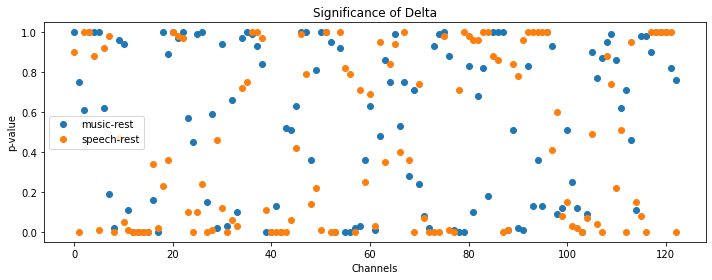

In [60]:
plt.figure(figsize=(10,4))
plt.title('Significance of Delta')
plt.plot(p_Delta_music,'o',label='music-rest')
plt.plot(p_Delta_speech,'o',label='speech-rest')
plt.legend()
#plt.ylim(-0.001,0.05)
plt.xlabel('Channels')
plt.ylabel('p-value')
plt.tight_layout()
plt.show()